# Importing Libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Loading Dataset

In [6]:
data_urls = ['https://raw.githubusercontent.com/chiraggarg95/Assignment-Datasets/main/0.csv', 
                    'https://raw.githubusercontent.com/chiraggarg95/Assignment-Datasets/main/1.csv',
             'https://raw.githubusercontent.com/chiraggarg95/Assignment-Datasets/main/2.csv',
             'https://raw.githubusercontent.com/chiraggarg95/Assignment-Datasets/main/3.csv']

comb_data = []

for url in data_urls:
    comb_data.append(pd.read_csv(url, index_col=None, header=None))

df = pd.concat(comb_data, axis=0, ignore_index=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,4.0,13.0,-18.0,-30.0,-119.0,-45.0,17.0,6.0,-1.0,-9.0,27.0,20.0,91.0,71.0,-26.0,-1.0,0.0,1.0,13.0,20.0,-62.0,-19.0,29.0,2.0,2.0,0.0,-23.0,-1.0,-80.0,4.0,-7.0,-6.0,-12.0,-27.0,-11.0,-16.0,-67.0,-8.0,-27.0,1.0,1.0,13.0,-8.0,-11.0,21.0,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,0.0,7.0,-31.0,-33.0,-48.0,-52.0,34.0,10.0,5.0,-9.0,23.0,63.0,76.0,49.0,-27.0,-7.0,-7.0,-3.0,0.0,4.0,-111.0,-2.0,-7.0,7.0,11.0,11.0,2.0,2.0,76.0,3.0,7.0,-2.0,0.0,-6.0,21.0,-3.0,0.0,-8.0,-40.0,-4.0,-1.0,6.0,-2.0,-2.0,-105.0,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,4.0,16.0,24.0,9.0,33.0,34.0,-1.0,-4.0,-3.0,-6.0,-7.0,-11.0,-85.0,-12.0,-10.0,-2.0,-3.0,-2.0,-8.0,-30.0,-16.0,-22.0,-21.0,-7.0,-8.0,-12.0,-14.0,-18.0,-76.0,-44.0,27.0,7.0,4.0,-4.0,-10.0,23.0,127.0,69.0,-25.0,-12.0,-9.0,1.0,18.0,-33.0,-128.0,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,-3.0,-4.0,18.0,21.0,-9.0,2.0,-8.0,0.0,3.0,5.0,-14.0,-15.0,13.0,-13.0,11.0,-4.0,-5.0,-8.0,-30.0,-27.0,-128.0,-22.0,-3.0,-5.0,-8.0,0.0,25.0,-9.0,-28.0,2.0,-22.0,8.0,8.0,-2.0,2.0,12.0,53.0,20.0,28.0,-9.0,-5.0,-5.0,-7.0,-7.0,-54.0,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,4.0,13.0,13.0,-16.0,-45.0,-7.0,-84.0,-8.0,-3.0,-4.0,-36.0,-26.0,-128.0,-55.0,75.0,3.0,-8.0,-12.0,14.0,12.0,87.0,56.0,-3.0,2.0,0.0,-7.0,4.0,15.0,-13.0,0.0,-15.0,1.0,3.0,8.0,-2.0,-6.0,-55.0,-24.0,1.0,5.0,5.0,2.0,11.0,12.0,60.0,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11673,-3.0,-1.0,-1.0,-1.0,-28.0,20.0,5.0,0.0,-5.0,0.0,2.0,5.0,-10.0,-17.0,-3.0,-2.0,12.0,2.0,2.0,2.0,-4.0,-28.0,1.0,-6.0,-5.0,-1.0,1.0,0.0,11.0,9.0,-4.0,14.0,2.0,-2.0,-2.0,-8.0,-17.0,1.0,-2.0,6.0,-14.0,-3.0,-4.0,-2.0,27.0,18.0,-6.0,-17.0,-4.0,1.0,-2.0,1.0,13.0,-12.0,-3.0,-3.0,1.0,4.0,3.0,4.0,-51.0,-49.0,5.0,-9.0,3
11674,-13.0,-5.0,-4.0,-3.0,-4.0,-24.0,-10.0,-8.0,20.0,9.0,9.0,7.0,5.0,50.0,31.0,18.0,-3.0,-3.0,1.0,-2.0,17.0,-6.0,-10.0,-18.0,-11.0,-5.0,-2.0,-2.0,10.0,21.0,-2.0,15.0,5.0,-2.0,-2.0,-6.0,-6.0,-50.0,-16.0,7.0,-12.0,-2.0,-3.0,1.0,21.0,48.0,12.0,-12.0,-1.0,3.0,2.0,5.0,-12.0,-8.0,5.0,6.0,-3.0,-3.0,-3.0,-5.0,-4.0,-45.0,-12.0,-15.0,3
11675,-1.0,-3.0,-1.0,1.0,30.0,38.0,-1.0,36.0,-10.0,1.0,4.0,0.0,-3.0,33.0,-2.0,-1.0,-1.0,2.0,-3.0,0.0,-38.0,-25.0,0.0,3.0,2.0,-1.0,0.0,-3.0,14.0,0.0,-1.0,-3.0,-3.0,-4.0,-3.0,-6.0,-2.0,13.0,-5.0,-19.0,-6.0,-5.0,-4.0,1.0,41.0,-10.0,-4.0,-9.0,3.0,3.0,2.0,3.0,1.0,50.0,12.0,14.0,-8.0,-4.0,-4.0,-4.0,-21.0,-29.0,-5.0,0.0,3
11676,1.0,4.0,4.0,5.0,9.0,-10.0,4.0,1.0,-2.0,-1.0,-1.0,-1.0,-5.0,12.0,1.0,-19.0,0.0,-4.0,-4.0,0.0,25.0,0.0,3.0,-5.0,1.0,1.0,-2.0,-4.0,-31.0,-17.0,-7.0,5.0,3.0,-5.0,-3.0,-1.0,4.0,-48.0,-13.0,-5.0,-14.0,6.0,5.0,6.0,-3.0,79.0,15.0,-6.0,-3.0,-1.0,-3.0,-1.0,-1.0,27.0,-2.0,-16.0,-3.0,0.0,-3.0,-5.0,-36.0,-90.0,3.0,5.0,3


In [7]:
x = df.iloc[:, 0:63].values
y = df.iloc[:, 64].values

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [16]:
rmseArr=[]
epoch=[]
for i in range(0,64):
  pca = PCA(n_components=i)
  x1 = pca.fit_transform(x)
  x2=pca.inverse_transform(x1)
  rmseArr.append(mean_squared_error(x, x2, squared=False)/np.sqrt(np.square(x).sum(axis=1)).mean())
  if mean_squared_error(x, x2, squared=False)/np.sqrt(np.square(x).sum(axis=1)).std()*100<1:
    print('Value for which the ratio is less than 1 is:'+str(i))
  epoch.append(i)

Value for which the ratio is less than 1 is:63


In [17]:
len(rmseArr)

64

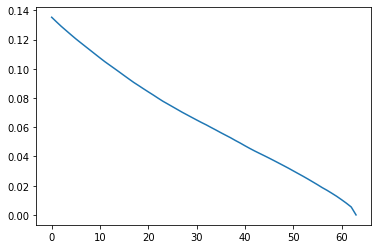

In [18]:
plt.plot(epoch, rmseArr)